### Installing the dependencies!

In [ ]:
# !pip install beautifulsoup4
# !pip install requests
# !pip install pandas
# !pip install ipython

In [10]:
from bs4 import BeautifulSoup as soup
import requests as req
import pandas as pd
from IPython.display import Image

### For this project we will scrape the list section goodreads.com

In [1]:
base_url = 'https://www.goodreads.com/list/'
field_or_interest_url = 'show/10634.What_s_the_Book_You_Can_t_Wait_to_Read_This_Summer_'

final_url = base_url + field_or_interest_url
print(f'Try checking the URL first: {final_url}')

Try checking the URL first: https://www.goodreads.com/list/show/10634.What_s_the_Book_You_Can_t_Wait_to_Read_This_Summer_


In [6]:
# If the URL is good and you can visit the webpage, then move on to the next step.
# Getting data from the webpage.

url_data = req.get(final_url)

In [8]:
# Let's see our data
print(f'Type of returned data: {type(url_data)}')
# Since, it is the response type from request module, we can use the methods of the same module.
print(f'Checking the returned data (First 50 characters): {url_data.text[:50]}')

Type of returned data: <class 'requests.models.Response'>
Checking the returned data (First 50 characters): <!DOCTYPE html>
<html class="desktop withSiteHeade


    - Since we got a response, luckily goodreads.com allow scrapping using ordinary python and we do not have to use any other tool to do so.
    ### Note: If you get an error 403 Forbidden response then you might have to switch to a scrapper or find another method.

Inspecting the webpage: 


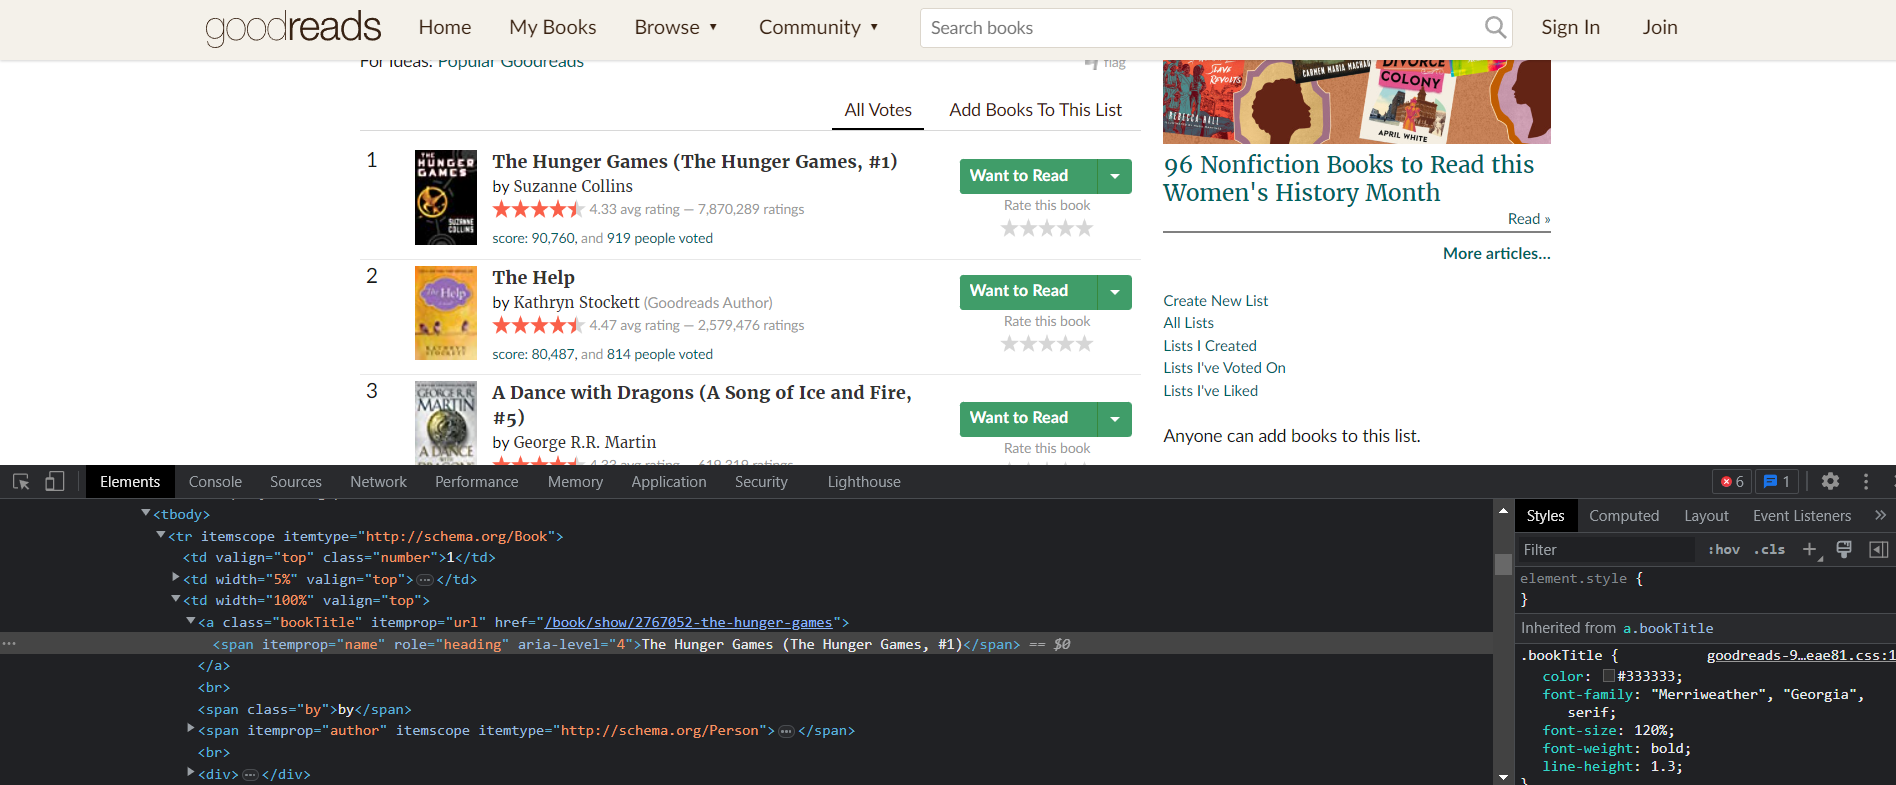

In [27]:
# Inspecting the the webpage on the brower, and finding the right tags.
# We will be making a database of the book title, author, rating, votes, and average score.

print(f'Inspecting the webpage: ')
Image(filename='Inspect_element.png', width=1500, height=800)

    - It can be observed that the title of the book is under the 'bookTitle' class, and the author of the book is within the span tag under the itemtype 'http://schema.org/Person'.
    We will be extracting information based on this for our database.

In [ ]:
url_content = url_data.content
# Since it is an HTML doctype, we will use the HTML parser from BeautifulSoup4 to parse our document.
url_soup = soup(url_content, 'html.parser')
print(f'Checking the first 100 characters: {url_soup.get_text()[:100]}')

    - It looks like we are all set to move on to the next step and search the parsed document and extract information out of it.

In [20]:
# Getting the total number of books on the first page.

tr_container = url_soup.find_all('tr', itemtype='http://schema.org/Book')
print(f'Type: {type(tr_container)}')
print(f'Length: {len(tr_container)}')

Type: <class 'bs4.element.ResultSet'>
Length: 100


The webpage has same amount of books: 


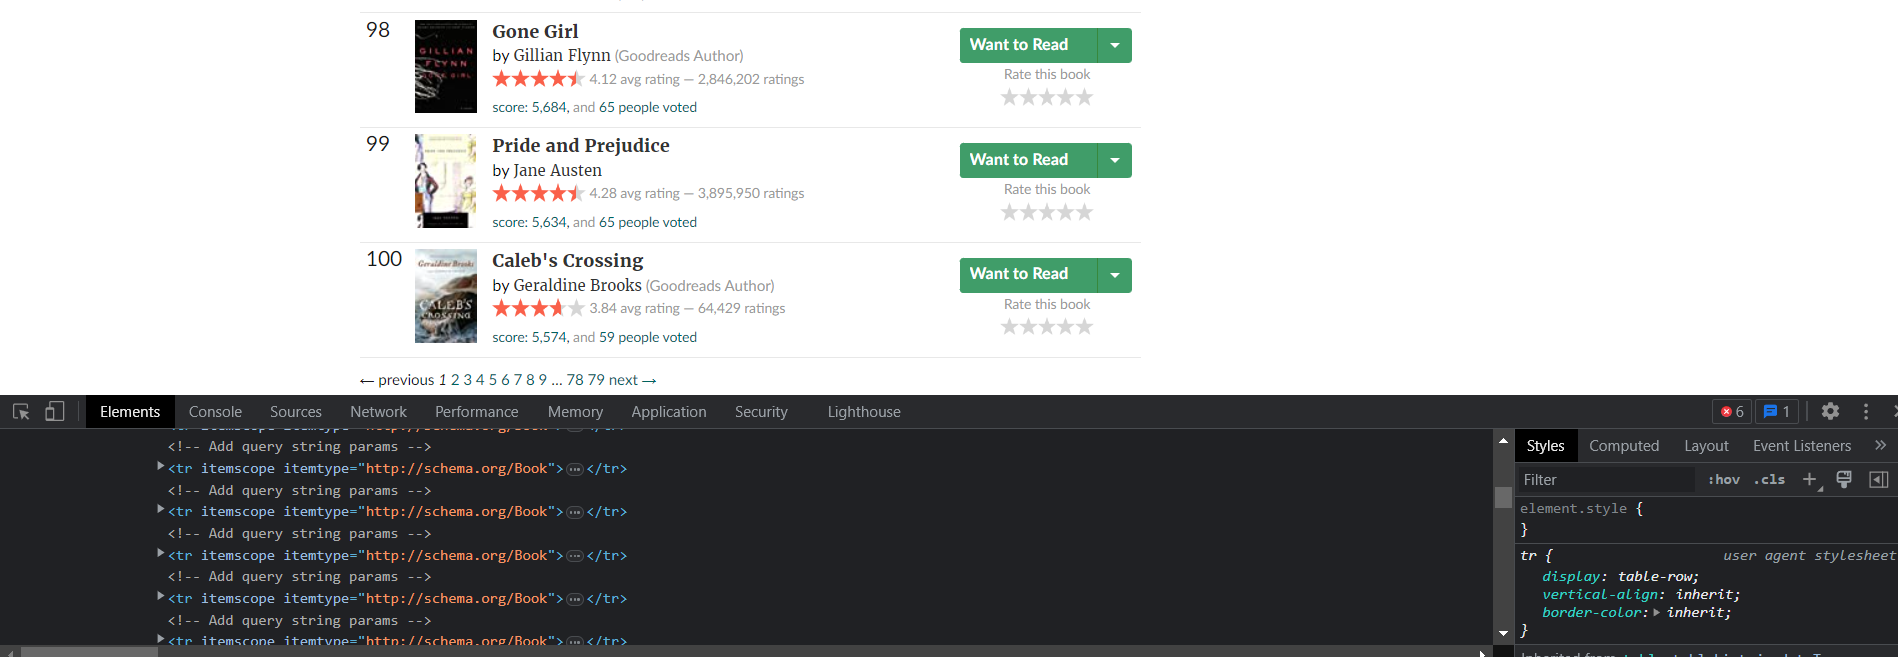

In [32]:
print(f"The webpage has same amount of books: ")
Image(filename='Inspect_tr.png', width=1500, height=800)

In [68]:
# Extracting information for the last book. Easier to verify from the above screenshot.
last_book = tr_container[-1]
book_title = last_book.find('a', class_='bookTitle')
book_title_1 = book_title.find('span', {'itemprop':'name'}).text
book_title = book_title.find('span', {'itemprop':'name'}).text.strip()
print(f'The title of the book is: {book_title}')
# Here we are using strip as an extra precaution to avoid any trailing or leading whitespaces.
# However in this case, the result without using the strip method is the same book title.
# This can be verified with the len function.
print(f'Verifying: {len(book_title) == len(book_title_1)}')

The title of the book is: Caleb's Crossing
Verifying: True


In [69]:
# Similary we will find the other information about the book.
authors = last_book.find('a', class_="authorName").text.strip()
rating = last_book.find('span', class_="greyText smallText uitext").text.strip()
scores = last_book.find('span', class_="smallText uitext").text.strip()

print(f'Authors: {authors}')
print(f'Ratings: {rating}')
print(f'Scores: {scores}')

Authors: Geraldine Brooks
Ratings: 3.84 avg rating — 64,437 ratings
Scores: score: 5,574,
              and
59 people voted


    - Although we have retrieved some information, it appears that our current results do not meet our requirements. In order to obtain more insightful data, we may need to fine-tune our criteria for rating and votes.

In [72]:
rating = rating.split()
scores = scores.split()

# Scores is divided in two parts, avg. rating and total ratings.
# Making two variables from score.

print(f'Watching what positions are important to us: {rating}')

average_rating = rating[0]
total_rating = rating[4]

# Similarly for votes.

total_score = scores[1][:-1]
people_voted = scores[3]

print(f'Book title: {book_title}')
print(f'Author(s): {authors}')
print(f'Average_rating: {average_rating}\nTotal_rating: {total_rating}')
print(f'Total_score: {total_score}\nPeople_voted: {people_voted}')

Watching what positions are important to us: ['3.84', 'avg', 'rating', '—', '64,437', 'ratings']
Book title: Caleb's Crossing
Author(s): Geraldine Brooks
Average_rating: 3.84
Total_rating: 64,437
Total_score: 5,574
People_voted: 59


    - Based on our analysis, it appears that we have successfully extracted the relevant information for the last book.